In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv(r'Raw Material/rainfall in india 1901-2015.csv')
dataset.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [3]:
dataset.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [4]:
dataset.drop(['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'],axis = 'columns',inplace=True)

In [5]:
dataset.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7


# Filtering Required Data

In [6]:
filter = dataset['SUBDIVISION'] == 'EAST UTTAR PRADESH'
d1 = dataset.where(filter)
d1.dropna(inplace = True)

In [7]:
filter =   dataset['SUBDIVISION'] == 'WEST UTTAR PRADESH'
d2 = dataset.where(filter)
d2.dropna(inplace = True)

#### Save Required data so that we can use it during model training 

In [8]:
print(d1)
print(d2)
#d1.to_csv('EastUttarPradeshClimate.csv')
#d2.to_csv('WestUttarPradeshClimate.csv')

             SUBDIVISION    YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL  \
1012  EAST UTTAR PRADESH  1901.0  62.6  31.3   8.2   1.1  13.6   21.8  226.5   
1013  EAST UTTAR PRADESH  1902.0   6.1   2.3   2.4   2.0  21.4   32.5  411.5   
1014  EAST UTTAR PRADESH  1903.0   8.2   0.4   1.3   0.7  15.3   71.6  115.3   
1015  EAST UTTAR PRADESH  1904.0   7.3   1.5   8.3   0.4  28.7  148.0  359.4   
1016  EAST UTTAR PRADESH  1905.0  16.8  23.6  20.0   5.4  15.4   17.3  302.4   
...                  ...     ...   ...   ...   ...   ...   ...    ...    ...   
1122  EAST UTTAR PRADESH  2011.0   1.0   2.7   1.6   2.9  32.2  163.8  197.9   
1123  EAST UTTAR PRADESH  2012.0  20.3   1.2   3.4   2.8   0.2   18.5  234.2   
1124  EAST UTTAR PRADESH  2013.0   6.1  59.6   2.7   8.7   1.1  309.7  230.0   
1125  EAST UTTAR PRADESH  2014.0  47.4  25.8  15.4   1.7  10.7   47.8  224.5   
1126  EAST UTTAR PRADESH  2015.0  30.0   4.1  48.2  23.2   8.6   95.3  179.0   

        AUG    SEP    OCT   NOV   DEC  

# Merging above dataset

In [9]:
dataset = pd.concat([d1 , d2] , ignore_index=True)

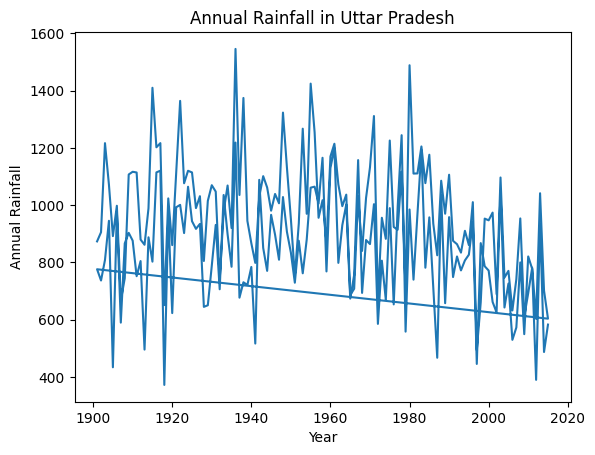

In [10]:
plt.plot(dataset['YEAR'] , dataset['ANNUAL'] )
plt.xlabel('Year')
plt.ylabel('Annual Rainfall')
plt.title('Annual Rainfall in Uttar Pradesh')
plt.show()

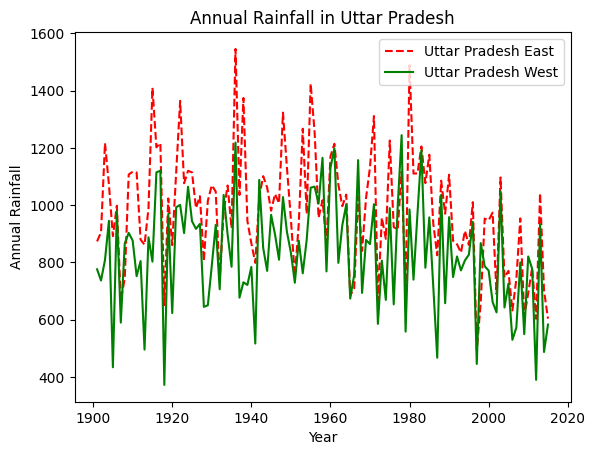

In [11]:
plt.plot(d1['YEAR'] , d1['ANNUAL'] , 'r--', label='Uttar Pradesh East')
plt.plot(d2['YEAR'] , d2['ANNUAL'] , 'g-' , label='Uttar Pradesh West')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall')
plt.title('Annual Rainfall in Uttar Pradesh')
plt.savefig("UPAnnualRainfall.png")
plt.legend(loc=1)
plt.show()

In [12]:
d1.drop(['SUBDIVISION'] , axis = 1 , inplace=True)
d2.drop(['SUBDIVISION'] , axis = 1 , inplace=True)

In [13]:
corr1 = d1.corr()
corr2 = d2.corr()

In [14]:
import seaborn as sns

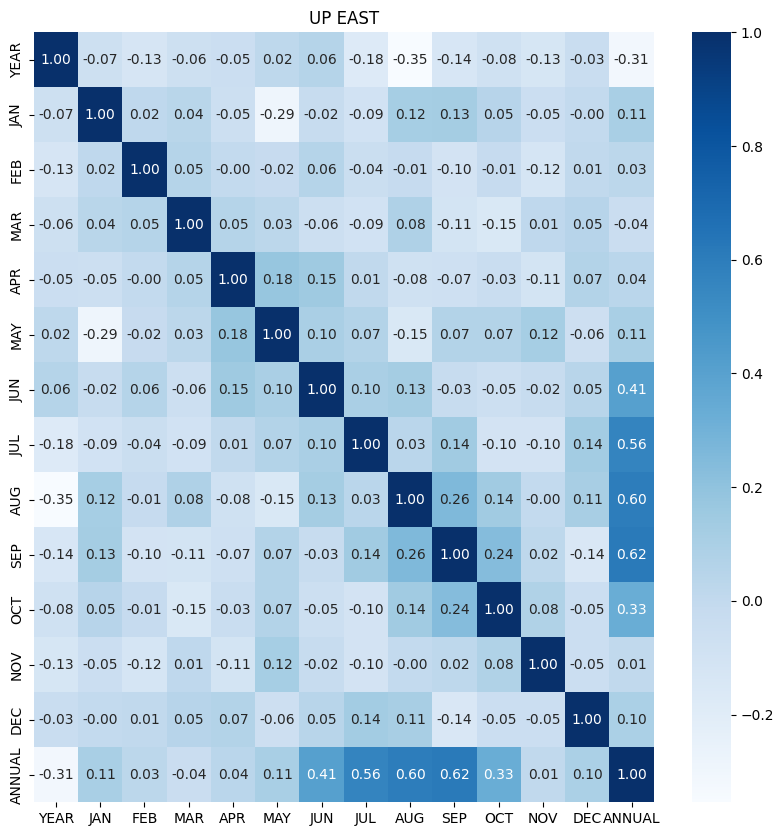

In [15]:
plt.figure(figsize=(10 , 10 ))
sns.heatmap(corr1 , annot = True , fmt = '.2f' , cmap='Blues')
plt.title('UP EAST')
plt.show()

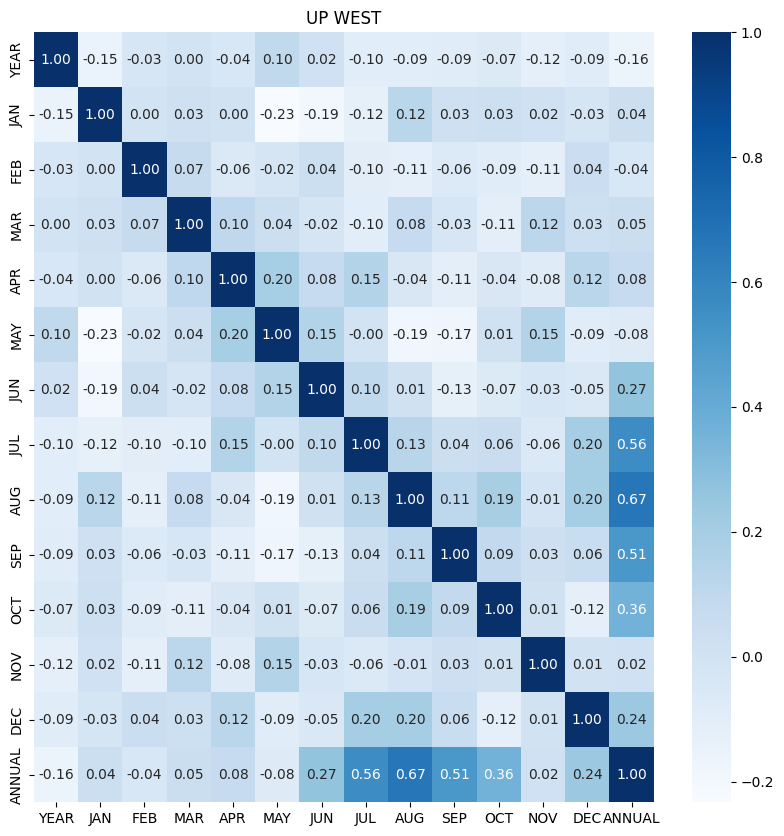

In [16]:
plt.figure(figsize=(10 , 10 ))
sns.heatmap(corr2 , annot = True , fmt = '.2f' , cmap='Blues')
plt.title('UP WEST')
plt.show()